# Brain Tumor Classification with CNN

### Import Libraries and Data

In [5]:
!pip install numpy tensorflow opencv-python matplotlib requests Pillow

In [6]:
import tensorflow as tf
import requests
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import seaborn as sns

from PIL import Image
from io import BytesIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def load_and_preprocess_image(url, resize_shape=(128, 128), normalize=True):
    try:
        response = requests.get(url)
        response.raise_for_status()  
        image = Image.open(BytesIO(response.content)).convert('RGB')  
        image = image.resize(resize_shape)  # Resize 
        image_array = np.array(image)
        if normalize:
            image_array = image_array / 255.0  
        return image_array, url.split('/')[-1]  
    except Exception as e:
        print(f"Failed to retrieve {url}: {str(e)}")
        return None

image_urls = [
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/1%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/10%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/11%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/12%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/13%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/14%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/15%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/17%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/18%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/19%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/20%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/21%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/22%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/23%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/24%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/25%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/26%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/27%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/28%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/29%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/3%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/30%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/31%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/32%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/33%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/34%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/35%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/36%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/37%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/38%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/39%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/4%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/41%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/42%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/43%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/44no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/45%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/46%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/47%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/48%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/49%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/5%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/50%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/6%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/7%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/8%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/9%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N11.jpg' ,
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N20.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N2.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N22.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N26.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N5.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No18.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No19.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%201.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2010.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20100.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%202.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%203.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%204.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%205.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%206.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%207.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%208.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2089.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%209.png',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2090.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2091.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2092.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20923.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2094.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2095.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2096.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2097.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2098.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2099.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y1.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y10.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y100.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y101.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y102.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y103.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y104.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y105.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y106.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y107.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y108.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y109.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y111.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y112.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y113.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y114.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y115.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y116.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y117.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y120.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y146.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y147.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y148.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y153.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y154.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y155.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y156.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y157.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y158.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y159.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y16.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y160.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y161.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y162.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y163.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y164.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y165.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y166.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y167.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y168.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y169.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y170.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y18.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y180.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y181.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y182.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y183.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y184.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y185.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y186.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y187.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y188.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y192.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y193.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y194.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y195.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y2.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y23.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y24.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y242.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y243.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y244.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y245.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y246.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y247.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y248.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y249.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y25.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y250.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y251.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y252.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y253.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y254.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y255.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y256.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y257.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y258.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y259.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y26.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y27.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y28.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y29.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y30.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y31.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y32.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y33.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y34.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y35.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y36.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y37.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y38.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y39.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y4.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y40.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y41.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y42.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y44.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y45.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y46.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y47.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y49.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y50.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y51.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y52.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y53.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y54.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y55.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y56.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y58.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y59.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y60.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y61.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y62.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y65.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y66.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y67.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y69.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y7.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y70.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y71.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y73.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y74.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y75.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y76.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y77.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y78.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y79.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y8.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y81.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y82.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y85.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y86.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y89.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y9.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y90.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y91.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y95.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y96.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y97.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y98.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y99.JPG',
    
]

images, titles = zip(*[load_and_preprocess_image(url) for url in image_urls])
images = [img for img, title in zip(images, titles) if img is not None]
titles = [title for img, title in zip(images, titles) if img is not None]

print("Total loaded images:", len(images))



Total loaded images: 252


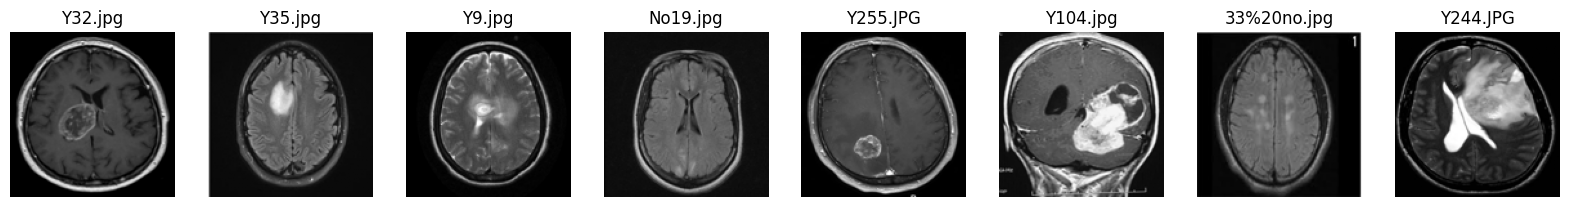

In [7]:
#Images
def display_random_images(images, titles, num_images=8):
    if len(images) < num_images:
        print(f"Not enough images to display: have {len(images)}, need {num_images}")
        return

    indices = random.sample(range(len(images)), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(titles[index])
        ax.axis('off')
    plt.show()

display_random_images(images, titles)


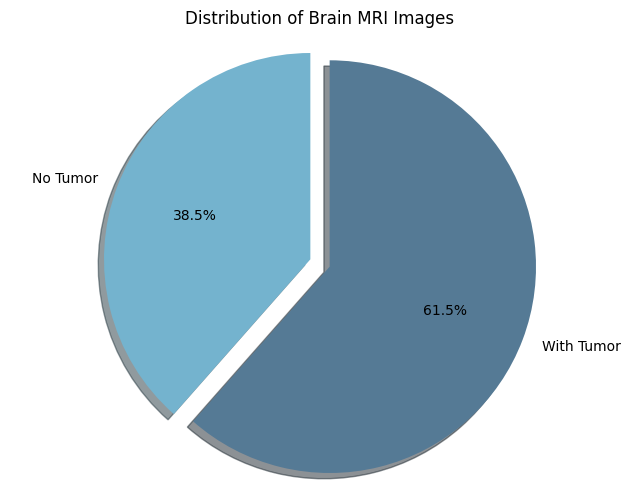

In [8]:
#Distribution pie chart

labels = np.array([1 if 'yes' in url.lower() or 'y' == url.lower() else 0 for url in image_urls if load_and_preprocess_image(url)[0] is not None])

labels_count = [np.sum(labels == 0), np.sum(labels == 1)]
chart_labels = ['No Tumor', 'With Tumor']
colors = ['#74B3CE', '#557A95']
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(labels_count, explode=explode, labels=chart_labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of Brain MRI Images')
plt.show()


### Data Augmentation


Oversample the Smaller Class: added 58 images to the no tumor class. This can include techniques like rotation, zoom, shift, and flip to create new variations of the existing images

In [9]:
# Filter tumor/no tumor
no_tumor_images = [img for img, label in zip(images, labels) if label == 0]
with_tumor_images = [img for img, label in zip(images, labels) if label == 1]

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_images(image_list, generator, number_of_images_to_add):
    augmented_images = []
    while len(augmented_images) < number_of_images_to_add:
        for img in image_list:
            img = img.reshape((1,) + img.shape)  #Reshape image
            for batch in generator.flow(img, batch_size=1):
                augmented_images.append(batch[0]) # Add new image to list
                if len(augmented_images) >= number_of_images_to_add:
                    break
            if len(augmented_images) >= number_of_images_to_add:#---- Need to create the correct amount of images
                break 
    return augmented_images

# Generate 58 images and ad to no tumor
additional_no_tumor_images = augment_images(no_tumor_images, datagen, 58)
no_tumor_images.extend(additional_no_tumor_images)

# Combine 
images = no_tumor_images + with_tumor_images
labels = [0] * len(no_tumor_images) + [1] * len(with_tumor_images)

# Shuffle
combined = list(zip(images, labels))
random.shuffle(combined)
images, labels = zip(*combined)

images = np.array(images)
labels = np.array(labels)

print("Total loaded images:", len(images))


Total loaded images: 310


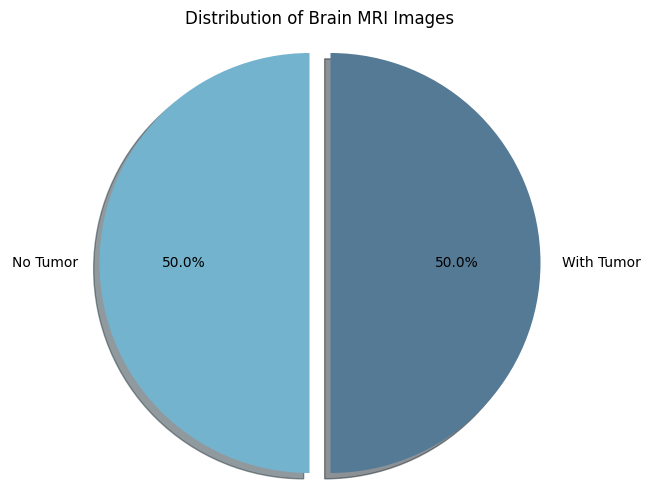

In [10]:
#Distribution pie chart after data augmentation 

labels_count = [np.sum(labels == 0), np.sum(labels == 1)]
chart_labels = ['No Tumor', 'With Tumor']
colors = ['#74B3CE', '#557A95']
explode = (0, 0.1)  

plt.figure(figsize=(8, 6))
plt.pie(labels_count, explode=explode, labels=chart_labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  
plt.title('Distribution of Brain MRI Images')
plt.show()

### Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

### Build the CNN Model


To improve the model's loss, I implemented L2 regularization, increased the dropout rate, and removed Conv2D layers.

In [12]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.6010 - loss: 1.1147 - val_accuracy: 0.7742 - val_loss: 0.6472
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.7669 - loss: 0.6284 - val_accuracy: 0.8065 - val_loss: 0.6189
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.8535 - loss: 0.5551 - val_accuracy: 0.8065 - val_loss: 0.6005
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.8548 - loss: 0.5396 - val_accuracy: 0.7903 - val_loss: 0.6123
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.8103 - loss: 0.6095 - val_accuracy: 0.8065 - val_loss: 0.5908
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.8828 - loss: 0.5139 - val_accuracy: 0.8065 - val_loss: 0.6205
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9243 - loss: 0.4010 - val_accuracy: 0.8710 - val_loss: 0.6018
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9262 - loss: 0.3686 - val_accuracy: 0.7742 - val_loss:

### Evaluate

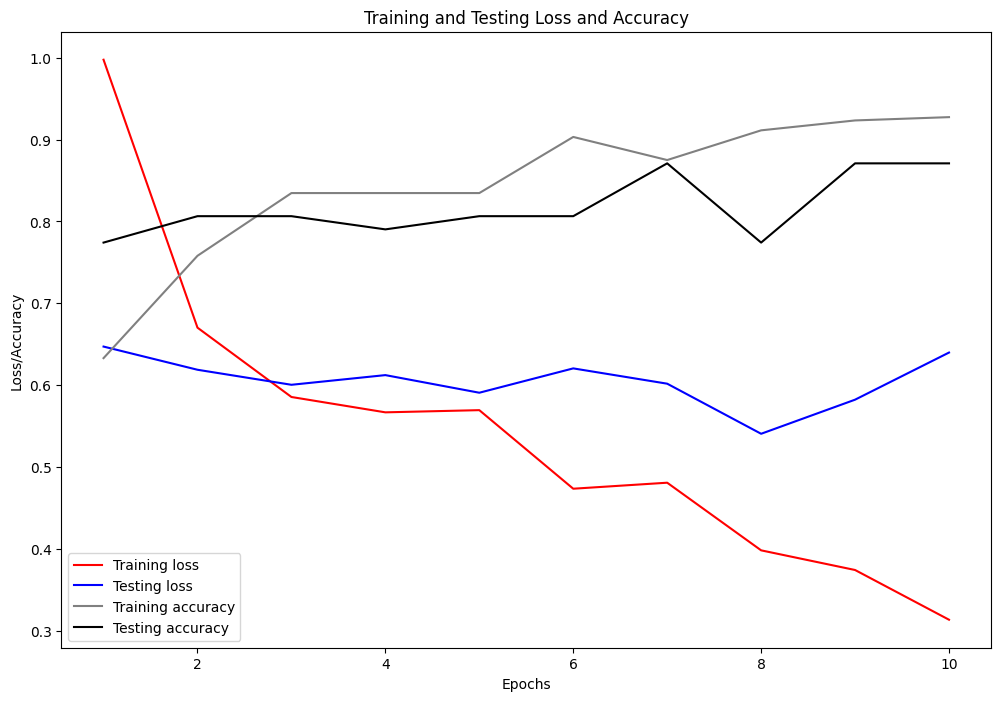

In [14]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, test_loss, 'blue', label='Testing loss')
plt.plot(epochs, train_acc, 'gray', label='Training accuracy')
plt.plot(epochs, test_acc, 'black', label='Testing accuracy')
plt.title('Training and Testing Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


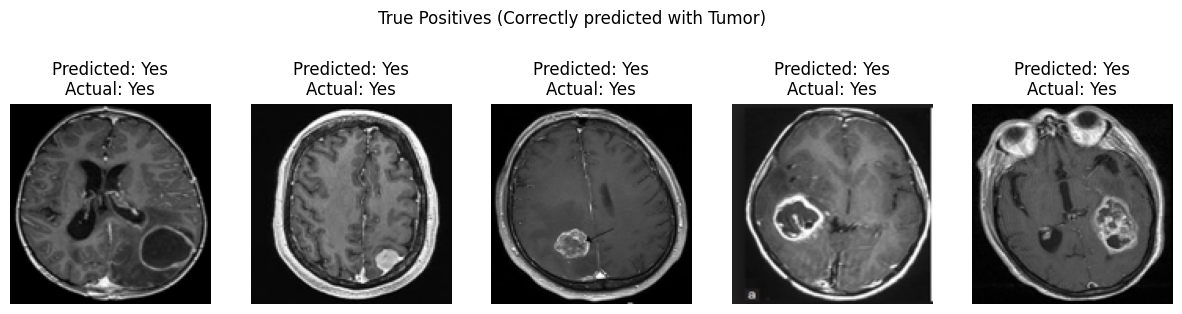

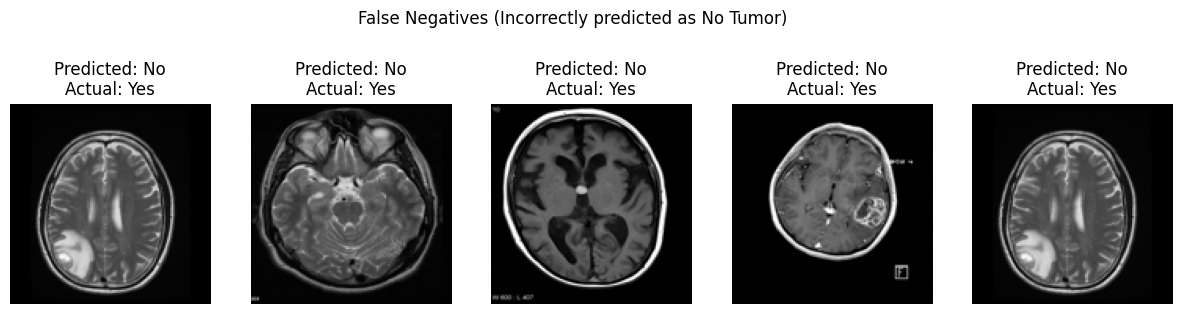

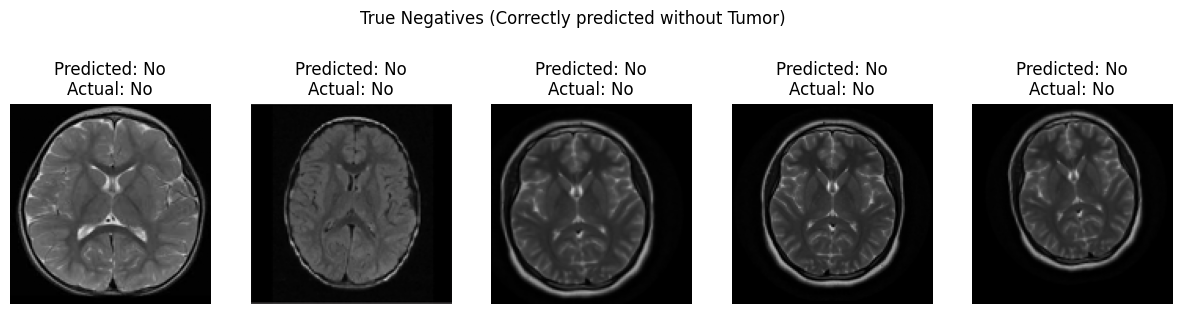

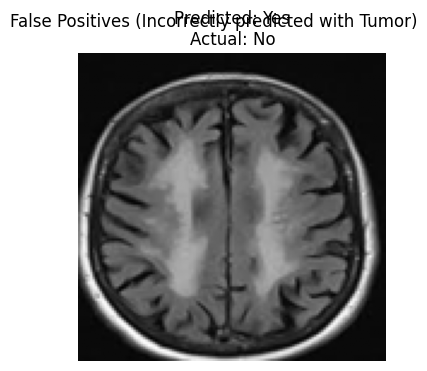

In [15]:
def display_classified_images(X, y_true, y_pred, num_images=5):
    true_positives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 1 and pred == 1]
    false_negatives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 1 and pred == 0]
    true_negatives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 0 and pred == 0]
    false_positives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 0 and pred == 1]

    def plot_images(indices, title):
        if len(indices) > num_images:
            indices = random.sample(indices, num_images)
        fig, axes = plt.subplots(1, len(indices), figsize=(num_images * 3, 4))
        if len(indices) == 1:
            axes = [axes]
        for ax, idx in zip(axes, indices):
            ax.imshow(X[idx])
            ax.set_title(f"Predicted: {'Yes' if y_pred[idx] == 1 else 'No'}\nActual: {'Yes' if y_true[idx] == 1 else 'No'}")
            ax.axis('off')
        plt.suptitle(title)
        plt.show()

    plot_images(true_positives, 'True Positives (Correctly predicted with Tumor)')
    plot_images(false_negatives, 'False Negatives (Incorrectly predicted as No Tumor)')
    plot_images(true_negatives, 'True Negatives (Correctly predicted without Tumor)')
    plot_images(false_positives, 'False Positives (Incorrectly predicted with Tumor)')

predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

display_classified_images(X_test, y_test, predicted_classes)


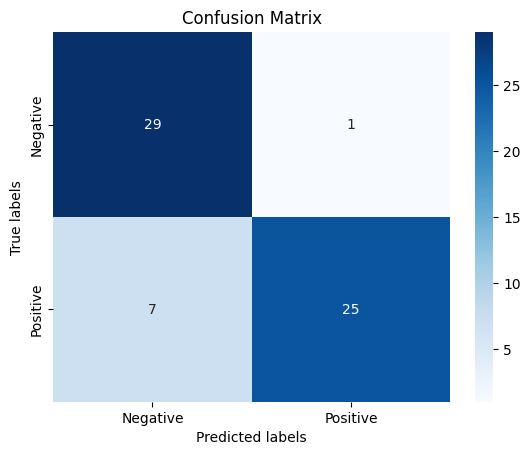

In [16]:
def plot_confusion_matrix(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')  # Draw the heatmap
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    plt.show()

plot_confusion_matrix(y_test, predicted_classes)


### References
1. Data Augmentation - [tf.keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
2. Data Augmentation - [Data Augmentation](https://medium.com/@abhishekjainindore24/data-augmentation-00c72f5f4c54)
3. Data Augmentation - [Python | Shuffle two lists with same order](https://www.geeksforgeeks.org/python-shuffle-two-lists-with-same-order/)
4. Data Augmentation - ChatGPT
5. [Matplotlib](https://matplotlib.org/)
6. [How to Make Predictions with Keras](https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/)
7. [Machine Learning - Confusion Matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)